In [1]:
import pandas as pd
import locale
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
batting = pd.read_csv("data/batting.csv")
batting = batting[["playerID", "AB", "H", "BB", "HBP", "SF", "yearID"]]

position = pd.read_csv("data/Appearances.csv")
position = position[["playerID","teamID", "yearID","G_all", "G_p", "G_c", "G_1b", "G_2b", "G_3b",
                     "G_ss", "G_lf", "G_cf", "G_rf", "G_of"]]

name = pd.read_csv("data/Master.csv")
name = name[["playerID", "nameLast", "nameGiven"]]

salary = pd.read_csv("data/Salaries.csv")
salary = salary[["playerID", "salary", "yearID"]]

In [3]:
master_list = pd.merge(batting, position, how="outer", on = ["playerID", "yearID"])
master_list = pd.merge(master_list, salary, how="outer", on = ["playerID", "yearID"])
master_list = pd.merge(master_list, name, how="outer", on = "playerID")
master_list.index = master_list.pop("playerID")
master_list = master_list[master_list.yearID == 2008]
average_salary = master_list["salary"].mean(axis=0)

In [4]:
average_salary

3305606.8562091505

In [5]:
master_list["OBA"] = (master_list.H + master_list.BB + master_list.HBP)/(master_list.AB + master_list.BB + master_list.HBP + master_list.SF)

In [6]:
master_list = master_list.dropna(how="any")
master_list = master_list[master_list.OBA != 0.0]
master_list = master_list[master_list.AB >= 300]
master_list = master_list[master_list.G_all >= 75]
master_list = master_list.drop_duplicates()
master_list = master_list.sort(columns="OBA", axis=0, ascending=False)
std_OBA = master_list["OBA"].std(axis=0)
average_OBA = master_list["OBA"].mean(axis=0)
std_salary = master_list["salary"].std(axis=0)
average_salary = master_list["salary"].mean(axis=0)

In [7]:
average_salary

4688444.8925619833

In [8]:
master_list["z_OBA"] = (master_list.OBA - average_OBA)/std_OBA
master_list["z_salary"] = (master_list.salary - average_salary)/std_salary

In [9]:
master_list["z_OBA_sal"] = master_list["z_OBA"] - master_list["z_salary"]

In [10]:
master_list = master_list.sort(columns="z_OBA_sal", axis = 0, ascending = False)
master_list = master_list[master_list.z_OBA_sal > 0.0]

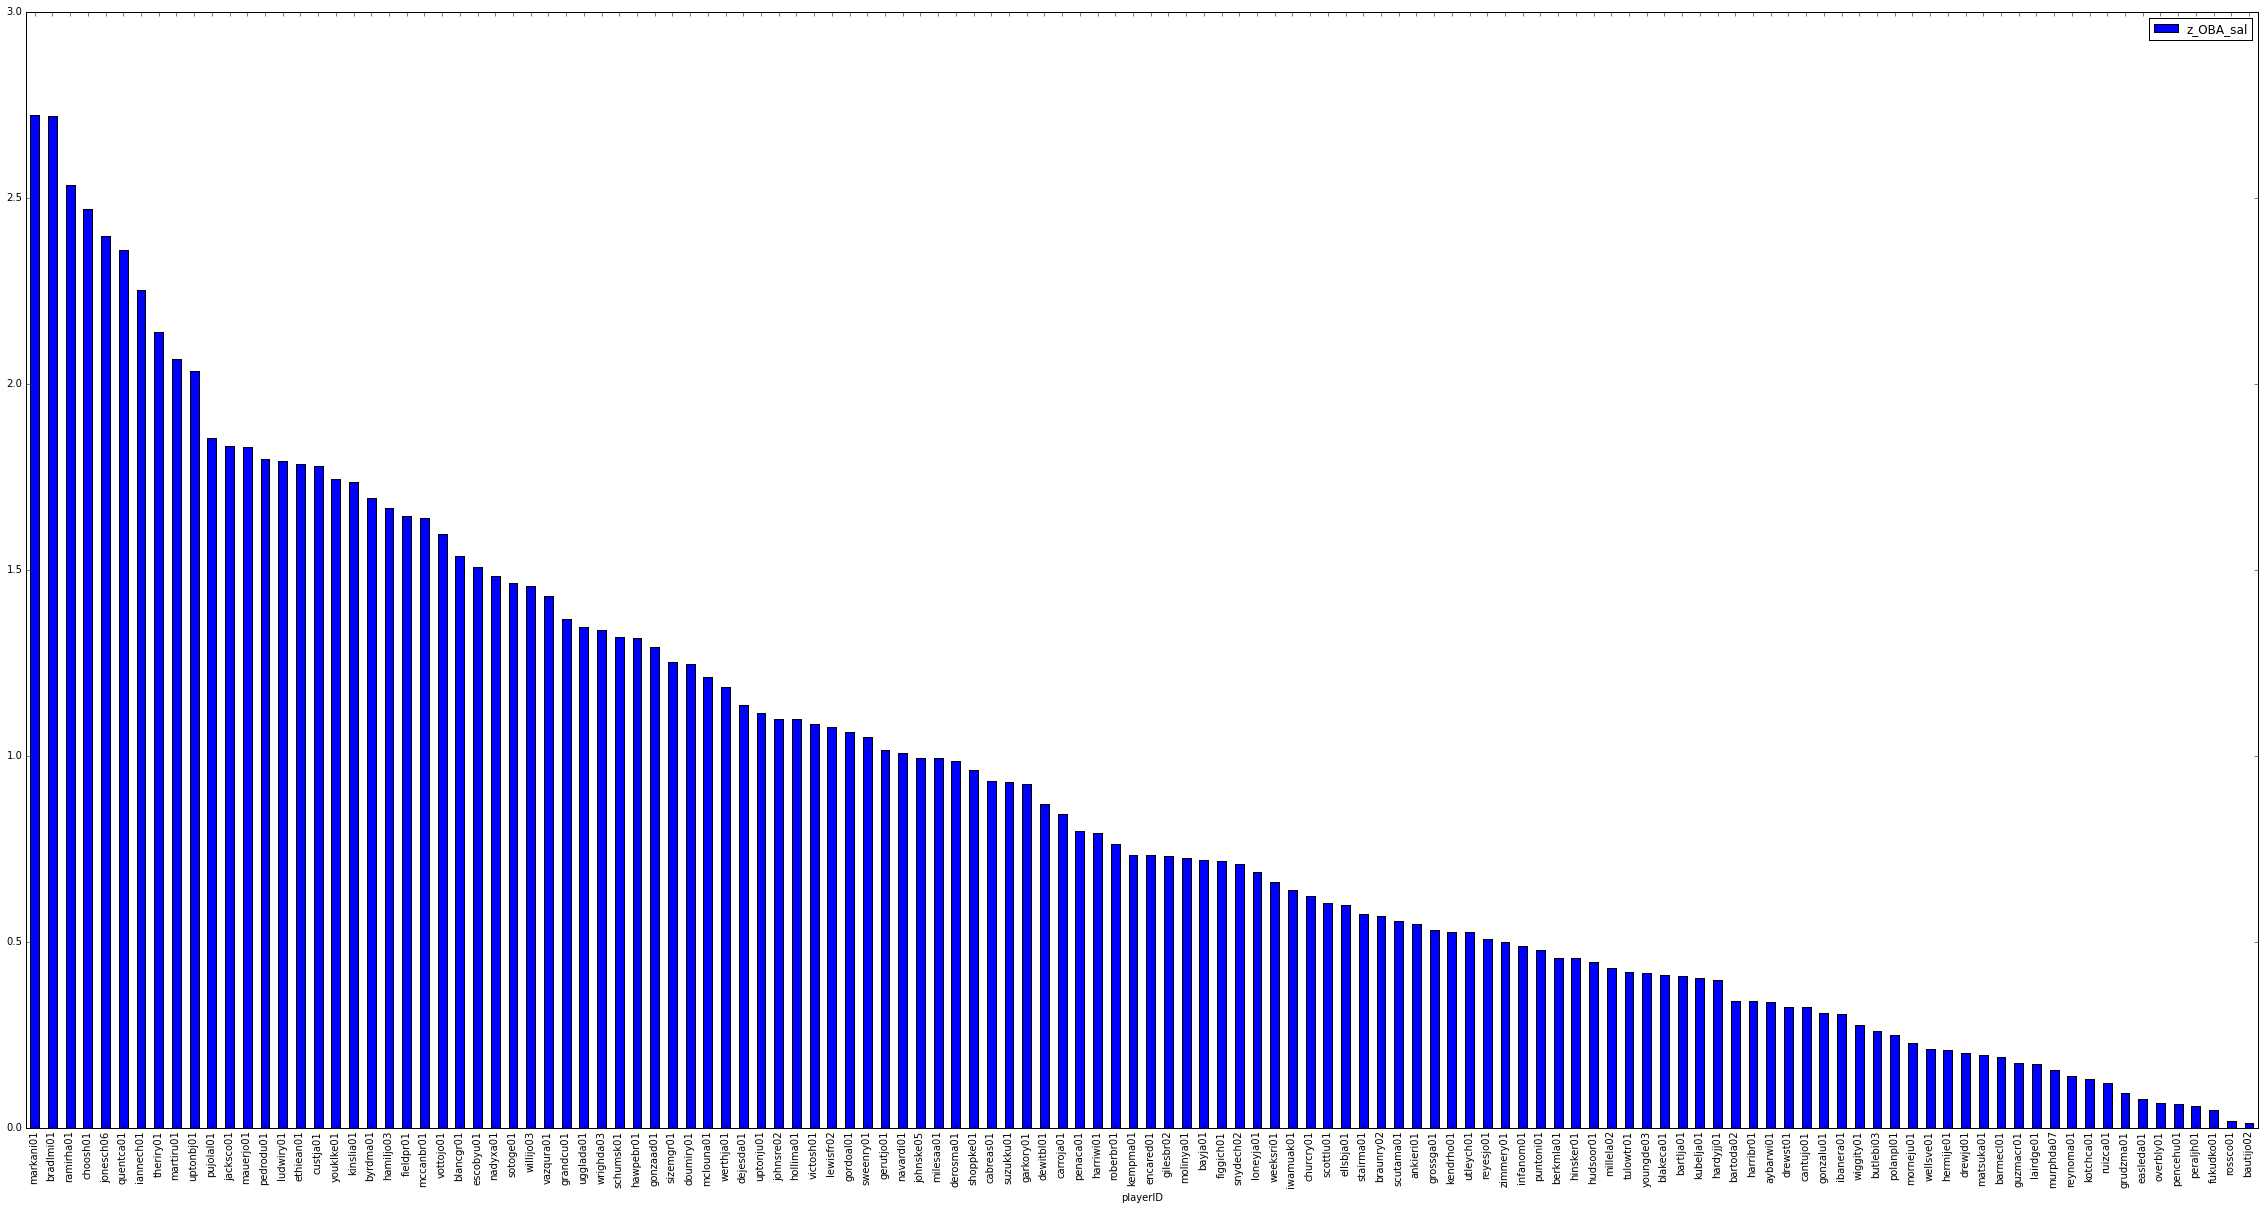

In [11]:
master_list[["z_OBA_sal"]].plot(kind="bar", figsize=(40, 20))

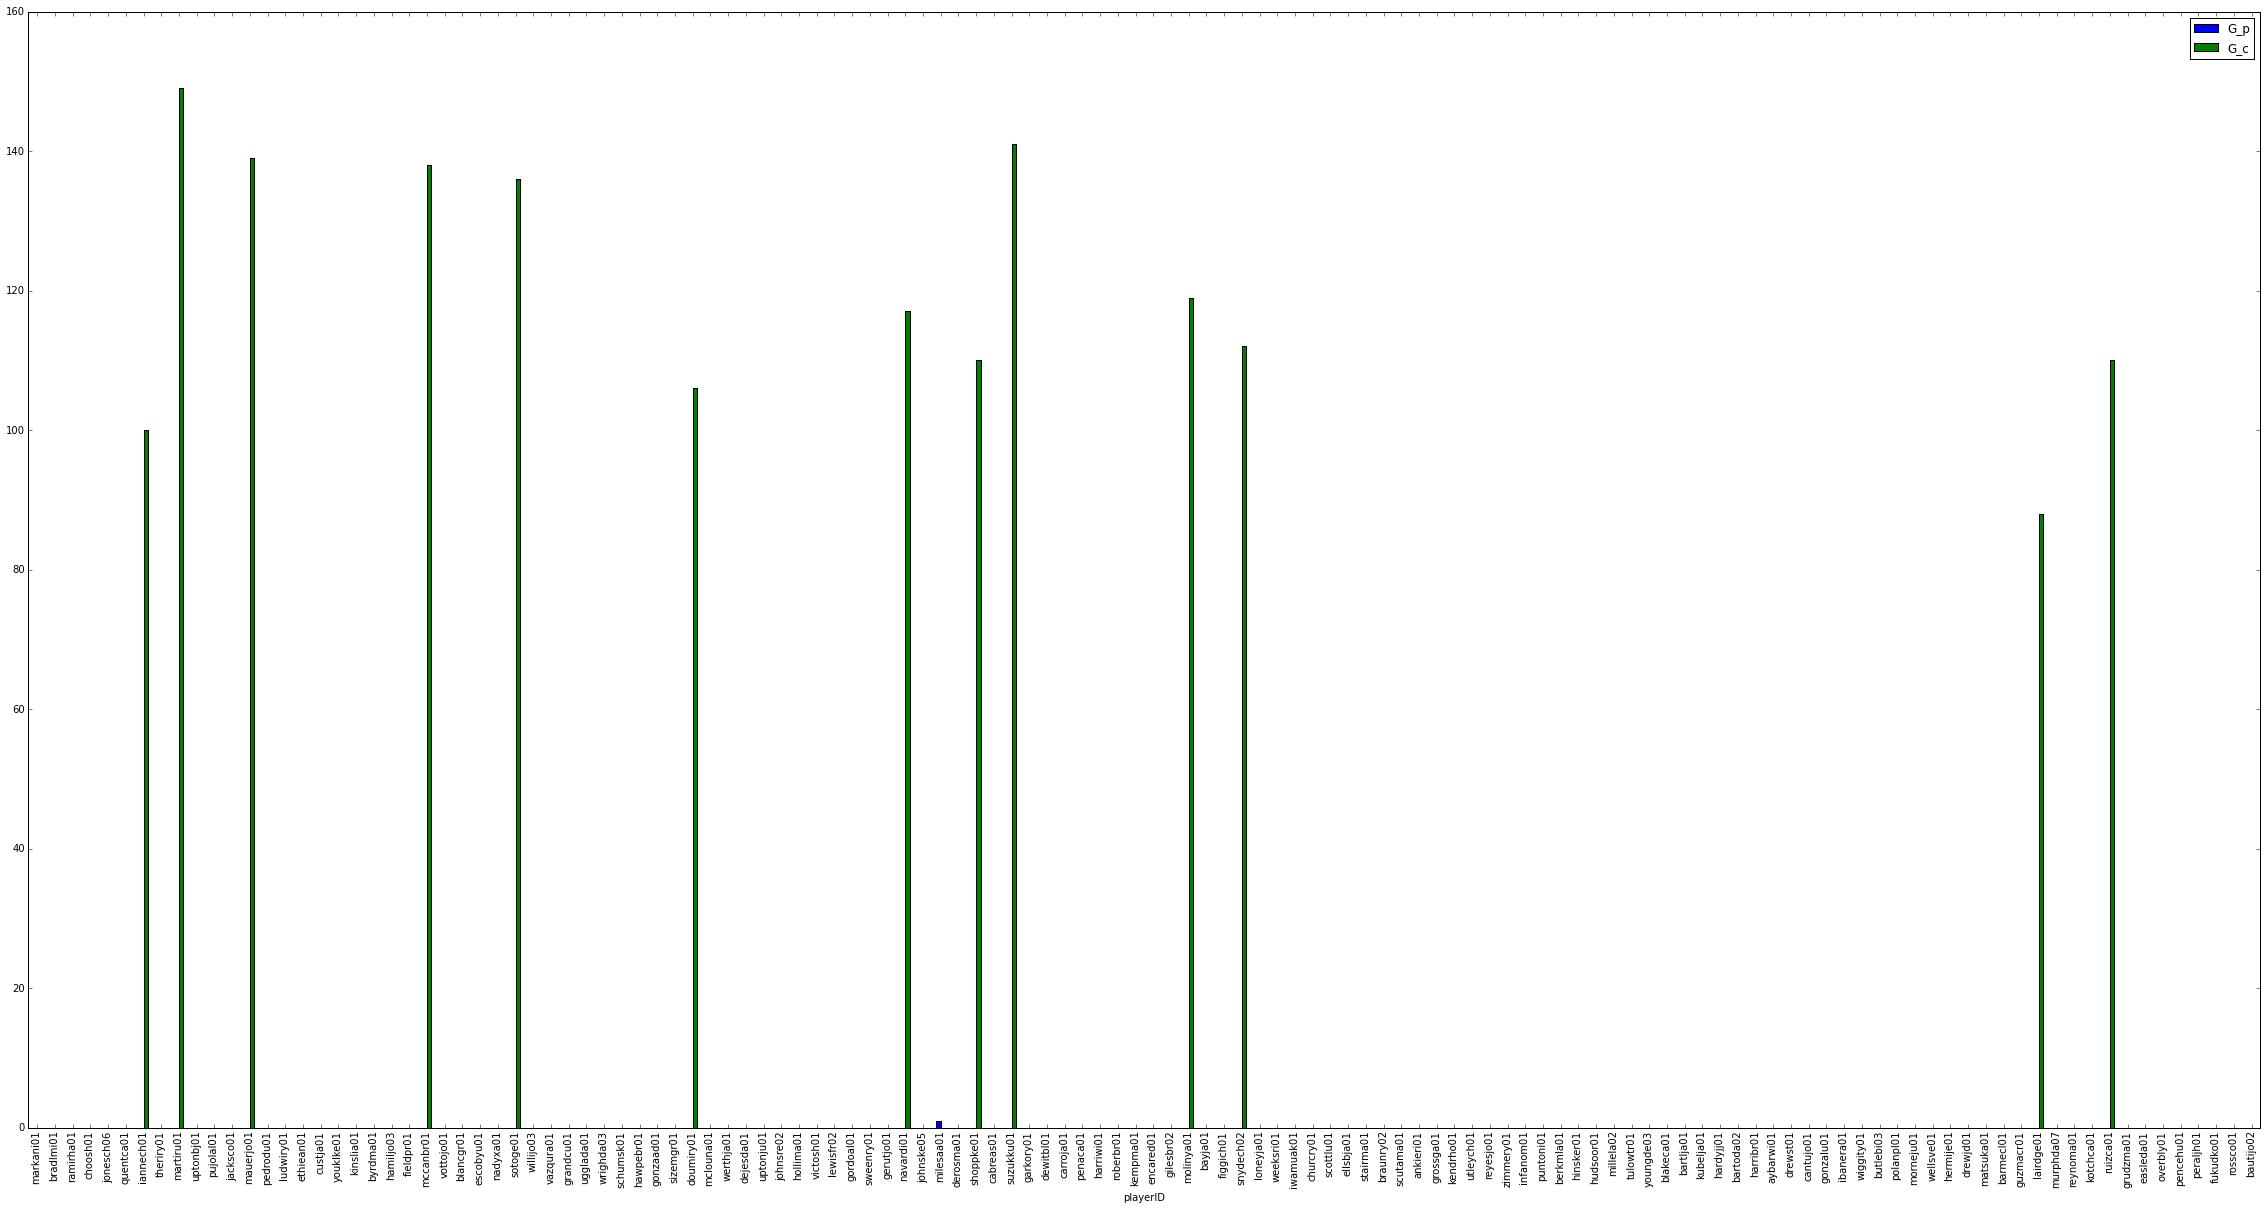

In [12]:
master_list[["G_p", "G_c"]].plot(kind="bar", figsize=(40, 20))

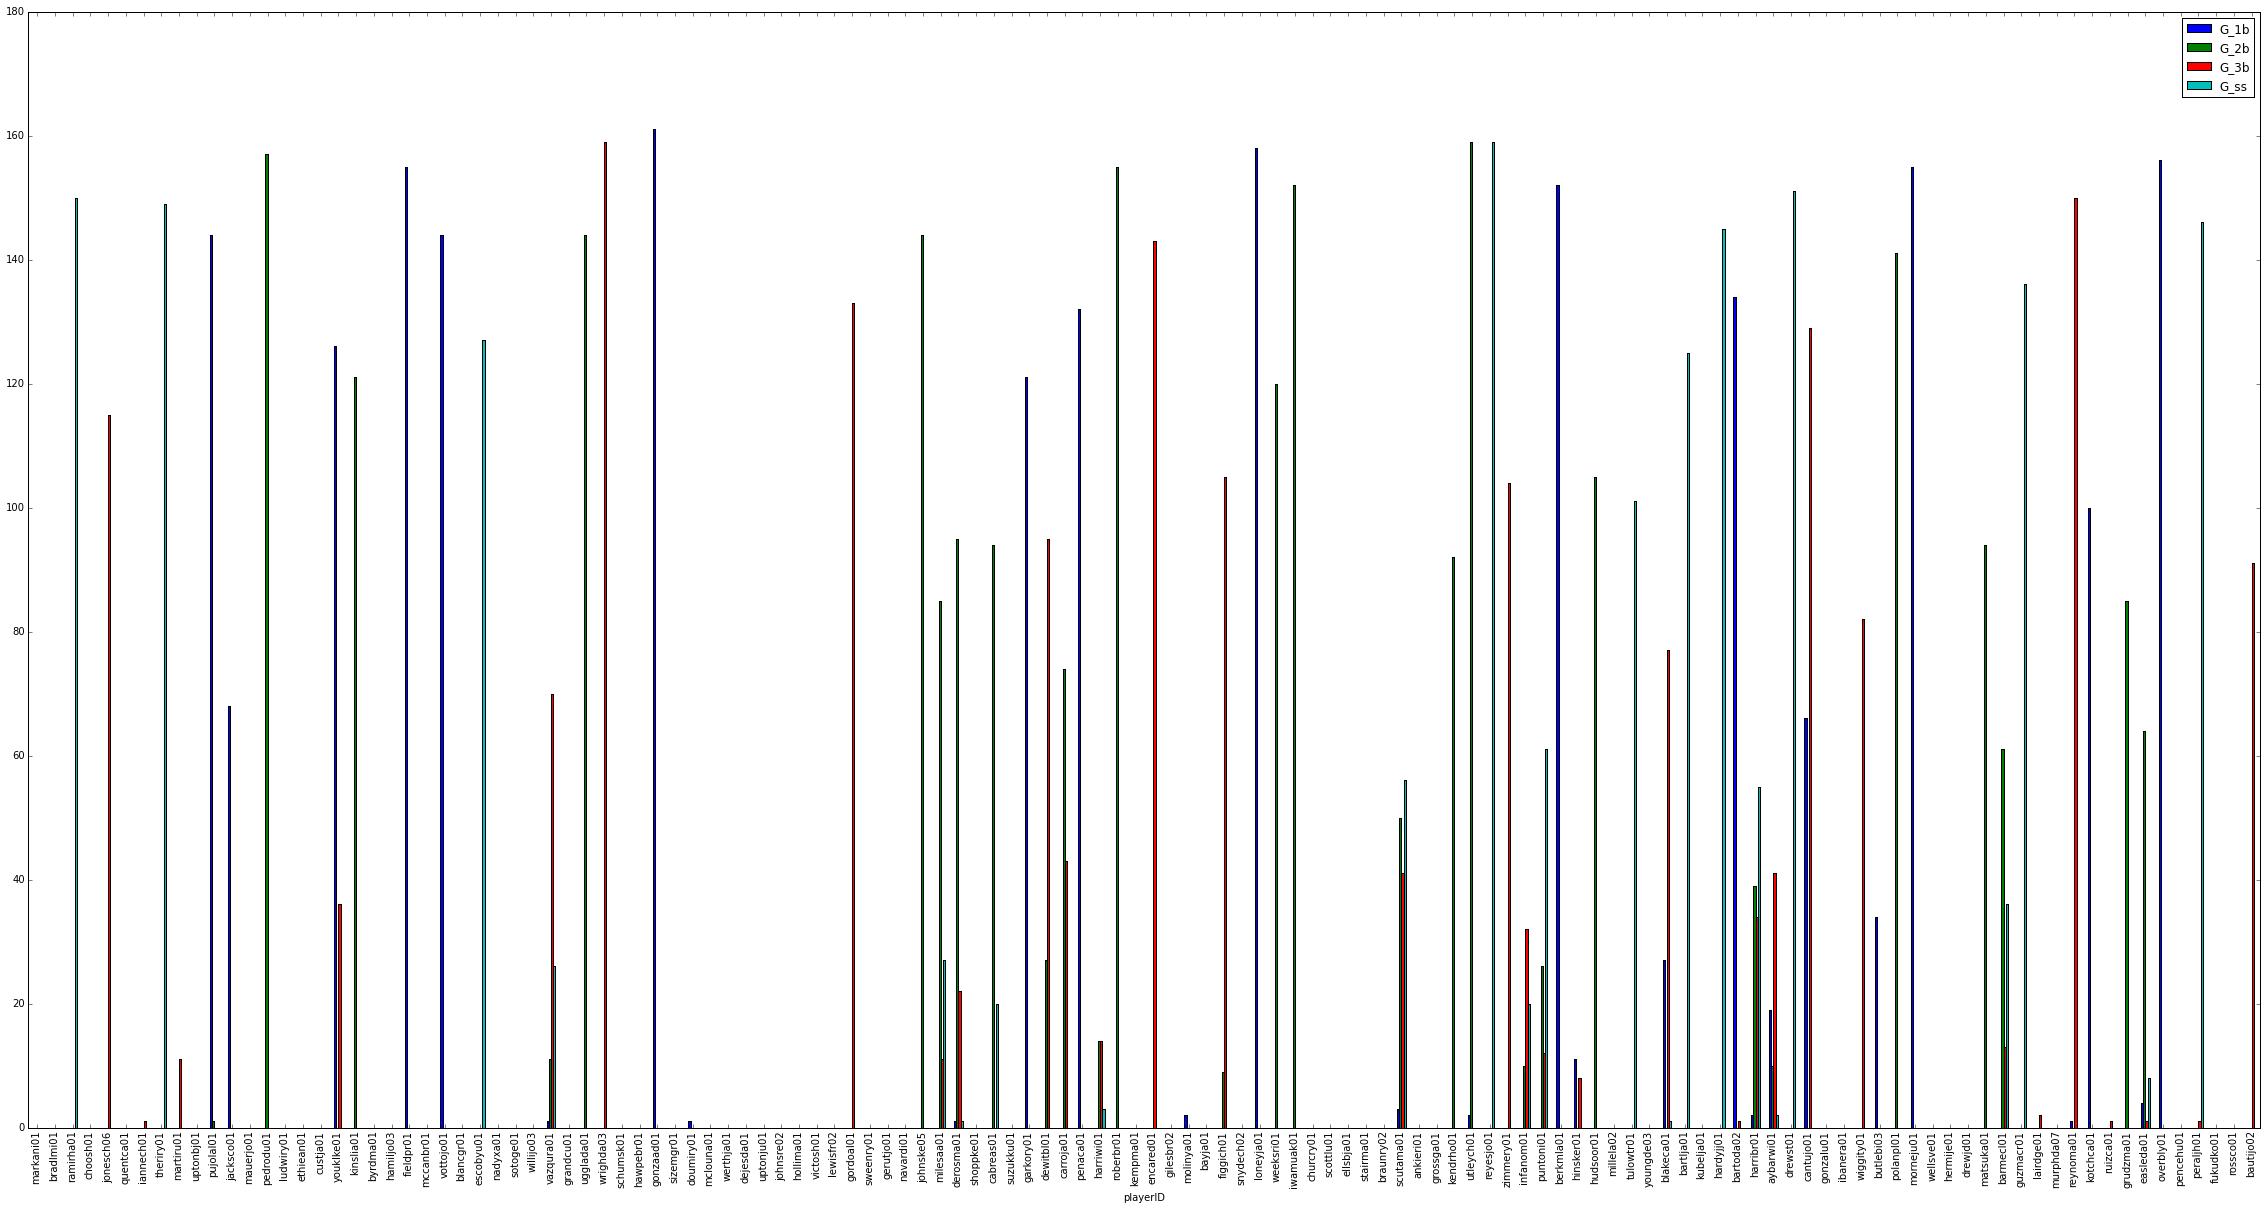

In [13]:
master_list[["G_1b", "G_2b", "G_3b", "G_ss"]].plot(kind="bar", figsize=(40, 20))

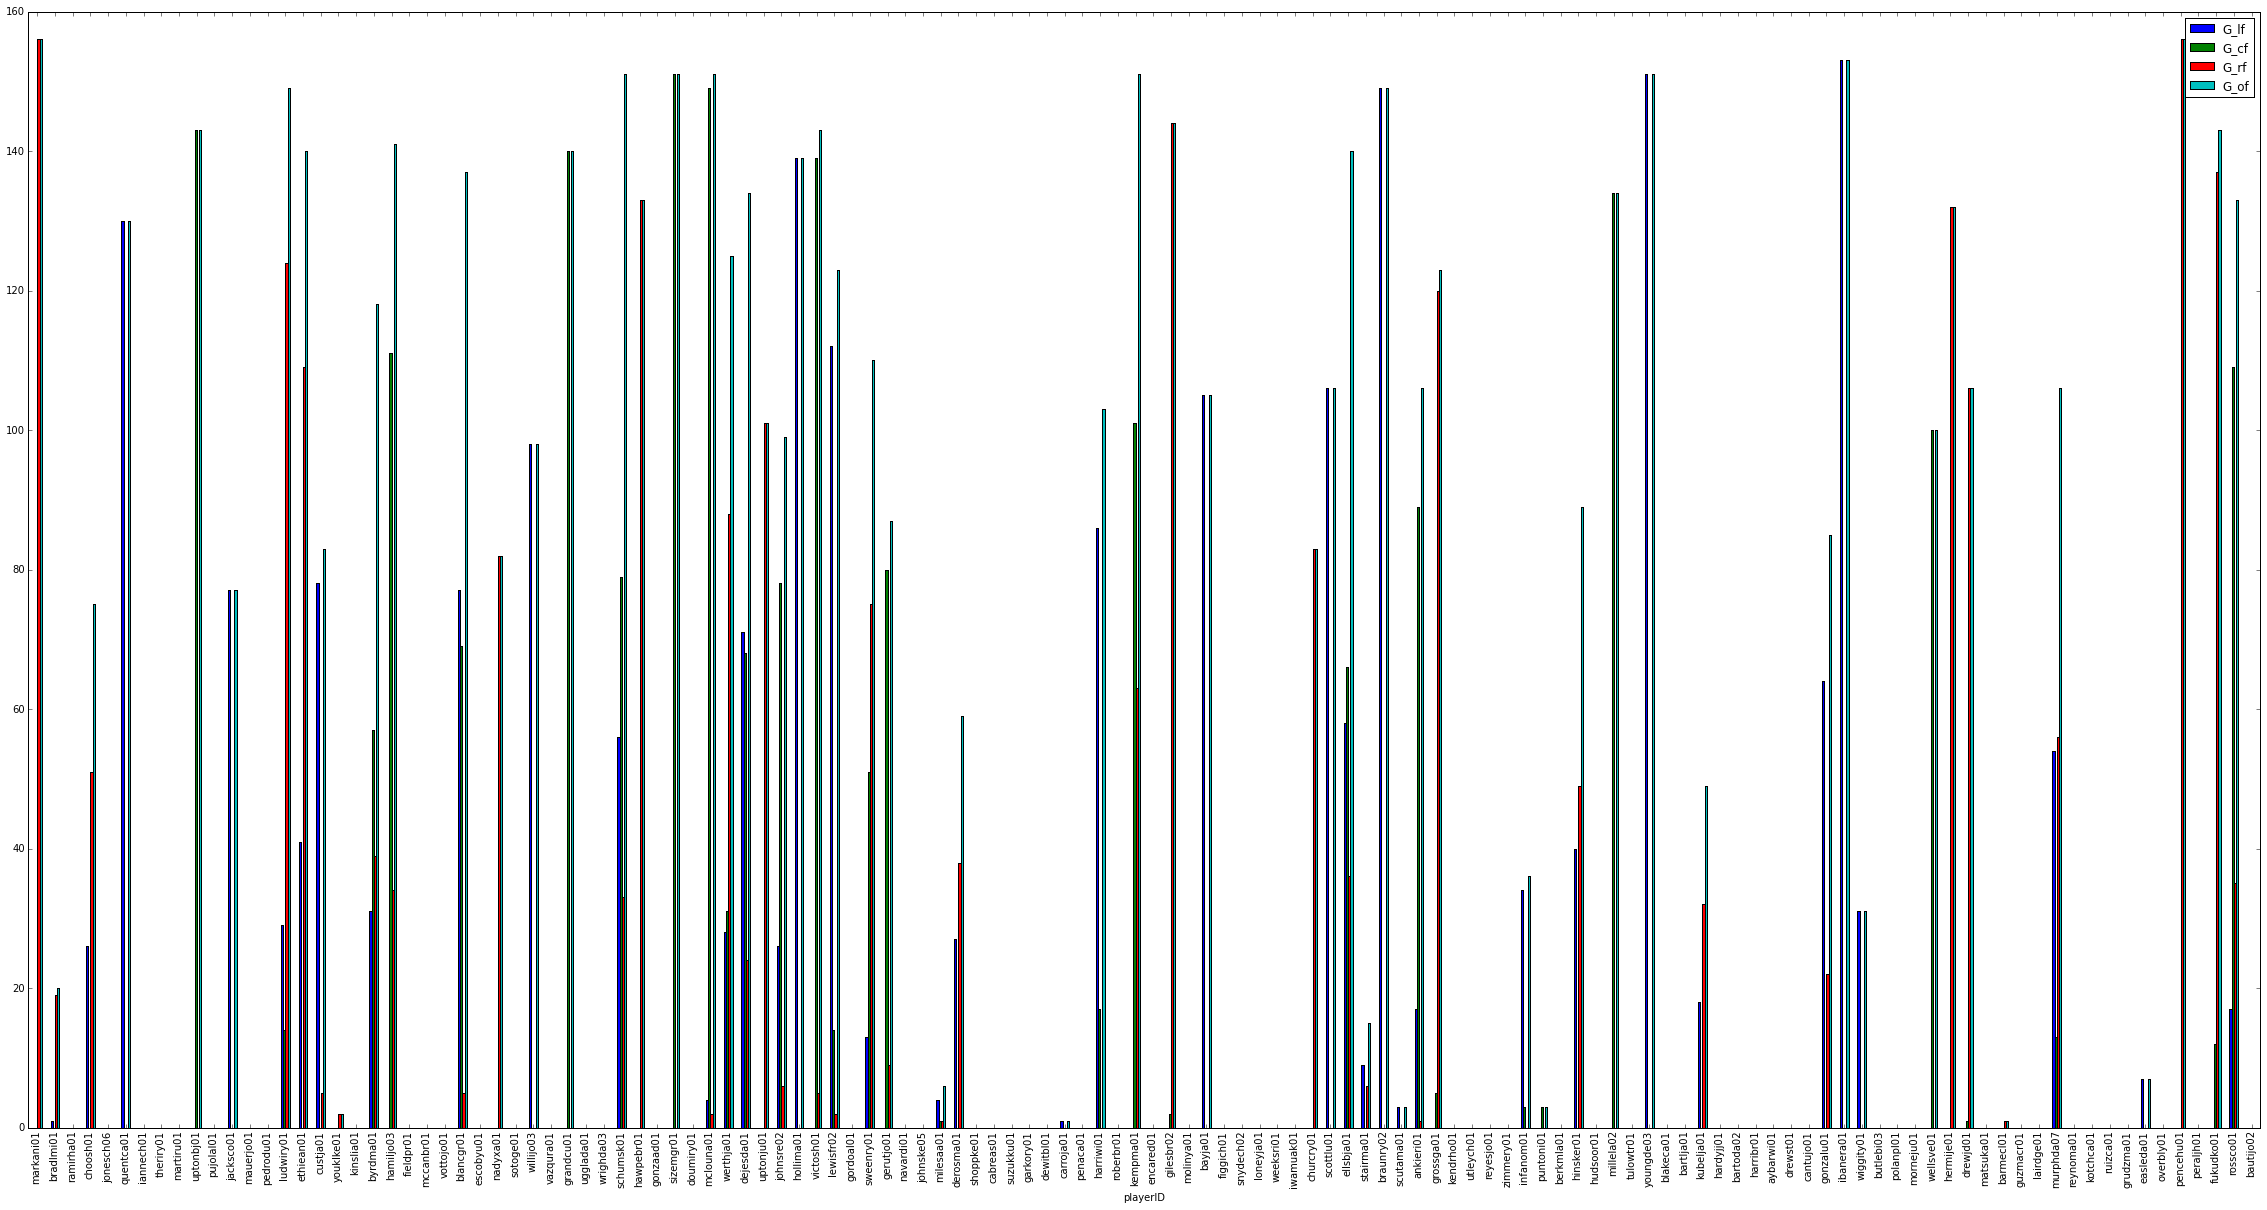

In [14]:
master_list[["G_lf", "G_cf", "G_rf", "G_of"]].plot(kind="bar", figsize=(40, 20))

In [15]:
master_list

,AB,H,BB,HBP,SF,yearID,teamID,G_all,G_p,G_c,...,G_cf,G_rf,G_of,salary,nameLast,nameGiven,OBA,z_OBA,z_salary,z_OBA_sal
playerID,,,,,,,,,,,,,,,,,,,,,
markani01,595,182,99,2,1,2008,BAL,157,0,0,...,0,156,156,455000,Markakis,Nicholas William,0.406026,1.915616,-0.805828,2.721444
bradlmi01,414,133,80,9,6,2008,TEX,126,0,0,...,0,19,20,5250000,Bradley,Milton Obelle,0.436149,2.826771,0.106891,2.719880
ramirha01,589,177,92,8,4,2008,FLO,153,0,0,...,0,0,0,439000,Ramirez,Hanley,0.399711,1.724622,-0.808874,2.533496
choosh01,317,98,44,5,4,2008,CLE,94,0,0,...,0,51,75,390400,Choo,Shin-Soo,0.397297,1.651602,-0.818125,2.469726
jonesch06,439,160,90,1,4,2008,ATL,128,0,0,...,0,0,0,12333333,Jones,Larry Wayne,0.470037,3.851796,1.455190,2.396606
quentca01,480,138,66,20,3,2008,CHA,130,0,0,...,0,0,130,400000,Quentin,Carlos Jose,0.393673,1.541980,-0.816297,2.358277
iannech01,333,88,56,14,2,2008,COL,104,0,100,...,0,0,0,396000,Iannetta,Christopher Domenic,0.390123,1.434613,-0.817059,2.251671
theriry01,580,178,73,3,1,2008,CHN,149,0,0,...,0,0,0,428000,Theriot,Ryan Stewart,0.386606,1.328213,-0.810967,2.139180
martiru01,553,155,90,5,2,2008,LAN,155,0,149,...,0,0,0,500000,Martin,Russell Nathan Coltrane,0.384615,1.268008,-0.797262,2.065271
